# <font color='DarkBlue'>Physical Biology of the Cell (NB2071) 
----
## <font color='CornflowerBlue'>Practical 6: Understanding molecular dynamics simulations
###### Arjen Jakobi, Tanja Kuhm, Els Sweep
---

## Introduction

Living systems are in a state of perpetual motion. At the nanoscale – the essential scale in which all biological processes take place – the atoms that make up biological macromolecules are continuously "*jiggling and wiggling*" [1]. These concerted atomic motions result in fluctuations between three-dimensional structures (**conformational states**) of the macromolecules that underlie all processes that maintain, propel and replicate a living cell. 

To understand the molecular processes mediated by these macromolecules it is therefore important to understand the physics of their motion. 

Investigating the dynamics of biological macromolecules at the level of atoms is the realm of molecular dynamics (MD) simulations. In this method, the forces acting on the atoms in a molecular system are calculated from a model potential energy function, usually a function of simple analytic form, and the atoms are moved iteratively in accordance with Newton’s differential equation of motion.

The code below will start a widget in which you can view the molecular dynamics trajectory for the conformational change of a protein called adenylate kinase from _Escherichia coli_. At this point it is not important to understand what the code does. You can move the molecule around with your mouse and zoom in or out with the midlle mouse button.

In [1]:
from shared.mdtools import view_adk_traj
view_adk_traj()

ModuleNotFoundError: No module named 'shared'

You will have seen that the protein undergoes a large conformational change, mainly by movement of two of its subdomains. We will learn more about this later in this practical. Here, we want to first understand how we can use protein structures to perform such simulations.

Possibly the best introduction to MD simulations is therefore to consider a simple computer program that will illustrate all the essential features required for such calculations. This is what we will attempt to do in the first part of this practical assignment. 

[1] [*The Feynman Lectures on Physics*](http://www.feynmanlectures.caltech.edu/I_03.html) **1**, 3-3 (1963)

## 1. How to build a simple molecular dynamics engine

### 1.1 Forces and potentials in molecular dynamics

In a  molecular dynamics simulation, the force on each atom will change whenever the atom changes its position, or whenever any of the other atoms with which it interacts changes its position. This implies that for any point in time we need to compute the forces acting on all atoms in order to predict their position for the next time step. 


These forces ___F<sub>i</sub>___ are usually derived from an potential energy function ___U___(___r___<sub>1</sub>,___r___<sub>2</sub>, ..., ___r___<sub>i</sub>, ...,  ___r___<sub>n</sub>) that depends upon the coordinates of all atoms i in the system:

<a id='equation_1'></a>
$
\begin{multline}
\mathbf{F_i}(r) =  m_ia_i = m_i\cfrac{\partial^2}{\partial t^2}r_i = - \cfrac{\partial}{\partial r} U(r_i)   \tag 1\,
\end{multline}
$  

where *m<sub>i</sub>* are the masses and *a<sub>i</sub>* instantaneonous accelerations of the individual atoms, respectively, and ___r<sub>i</sub>___ are the complete set of three-dimensional coordinates representing the atom centers. Each atom i at position ___r<sub>i</sub>___ is treated as a point with a mass *m<sub>i</sub>* and a fixed charge *q<sub>i</sub>* .

Let us start with a simple system consisting of two atoms that are covalently bonded to each other, e.g. **carbon monoxide (CO)**: 

<img align="left" src="images/CO.png" width="200"/>
<br/><br/><br/><br/><br/><br/><br/><br/><br/>


In a first approximation we could model these atoms as non-deformable (=hard) spheres. Assume we do know something about the equilibrium distance ___r___<sub>eq</sub> between these atoms, i.e. the equilibrium bond length, and that the stretching and compression of this bond can be modelled by two masses (represented by the atom nuclei) connected to each other by an ideal spring. 

In this case the potential would become
<a id='equation_2'></a>
$ 
\begin{multline}
\mathbf{U}(\mathbf{r}) =  \cfrac{1}{2}k(\mathbf{r}-\mathbf{r_{eq}})^2 + U_{min}    \tag 2\,
\end{multline}
$  

where *k* is the spring constant describing the "strength" of the bond. Our atoms would behave like particles in a simple harmonic oscillator.

<a id='exercise_1'></a>
---
## <font color='Teal'>Exercise 1:

Let us describe our CO molecule by two atoms located at position ___r<sub>1</sub>___ and ___r<sub>2</sub>___. The equilibrium bond length between both atoms is 1.1 Å, but for generality let us simply call this ___r<sub>0</sub>___.

- From the general expression of the energy potential (equation (2)) derive a general formula for the force ___F<sub>1</sub>___ acting on atom 1. 
- What is the force ___F<sub>2</sub>___ acting on atom 2?
---

In [ ]:
# Exercise 1: Fill in the formula for the forces (F1 and F2) acting on atom 1 and atom 2.
# You can write inside this box

F1 = ?

F2 = ?

---
## <font color='DarkMagenta'>Solution 1:

Let us describe our CO molecule by two atoms located at position ___r<sub>1</sub>___ and ___r<sub>2</sub>___. The equilibrium bond length between both atoms is 1.1 Å, but for generality let us simply call this ___r<sub>0</sub>___.

- From the general expression of the energy potential (equation (2)) derive a general formula for the force ___F<sub>1</sub>___ acting on atom 1. 
- What is the force ___F<sub>2</sub>___ acting on atom 2?

<font color='DarkMagenta'>
    
<a id='equation_1_sol'></a>
$ 
\begin{multline}
{U}(\mathbf{r}) =  \cfrac{1}{2}k(\mathbf{r}-\mathbf{r_{eq}})^2 + U_{min}    \tag {1}\,
\end{multline}
$  

<a id='equation_1_sol'></a>
$ 
\begin{multline}
{U}(\mathbf{r}) =  \cfrac{1}{2}k(\Vert\mathbf{r_1}-\mathbf{r_2}\Vert - {r_{0}})^2 + U_{min}    \tag {2}\,
\end{multline}
$  

For convenience, we can choose U<sub>min</sub> = 0. Then, 


<a id='equation_1'></a>
$
\begin{multline}
\mathbf{F_1}(\mathbf{r}) =  - \cfrac{\partial}{\partial r} U(\mathbf{r}) = -k(\Vert\mathbf{r_1}-\mathbf{r_2}\Vert - {r_{0}})   \tag {3}\,
\end{multline}
$  

From Newton's third law of motion it follows:

<a id='equation_1'></a>
$
\begin{multline}
\mathbf{F_2}(\mathbf{r}) =  -\mathbf{F_1}(\mathbf{r})    \tag {4}\,
\end{multline}
$  



<font color='black'>

### 1.2 Integrating the equations of motion

Once we have chosen the form of the energy potential and therefore can formulate an expression to compute all __forces__ acting on the atoms in our system, we need to derive (and then integrate) the equations of motion that will determine the __positions__ of all atoms in the system at every time step.

Let us revert briefly to equation [(__1__)](#equation_1):

$
\begin{multline}
\mathbf{F_i}(r) =  m_ia_i = m_i\cfrac{\partial^2}{\partial t^2}r_i = - \cfrac{\partial}{\partial r} U(r_i) 
\end{multline}
$

This vectorial equation represents a set of *3N* ordinary differential equations, one for each coordinate and each particle in the system. Since MD simulations will typically involve many molecules consisting of a great number of atoms, an entirely analytical solution of the resulting Newtonian mechanical system is practically impossible. Finding a numerical solution, however, is straightforward.

This integration can be easily performed using a time-stepping algorithm, a so-called finite difference method. The central idea is that the integration can be broken down into many small steps, each separated in time by a small time step `dt`. Given the molecular positions, and velocities, at time `t`, we attempt to obtain the positions, velocities etc. at a later time `t + dt`: 

The total force ___F___ on each atom in the configuration at a time `t` can be calculated as the the vector sum of its interactions with other atoms. According to *Equation (1)*, from the force ___F___ we can determine the accelerations of the atoms, which are then combined with the positions and velocities at time `t` to compute the positions and velocities at a later time `t + dt`.

We can start with a Taylor expansion of an atom coordinate ___r<sub>i</sub>___ around time `t`:

<a id='equation_3'></a>
$
\begin{multline}
\mathbf{r_i}(t + \delta{t}) =  \mathbf{r_i}(t) + \mathbf{v_i}(t)\delta{t} +  \cfrac{1}{2m_i}\mathbf{F_i}(t)\delta{t^2} + \cfrac{\partial^3 r(t)}{3!}\delta{t^3} +  \mathcal{O}(\delta{t^4}) \tag 3
\end{multline}
$

and 

<a id='equation_4'></a>
$
\begin{multline}
\mathbf{r_i}(t - \delta{t}) =  \mathbf{r_i}(t) - \mathbf{v_i}(t)\delta{t} +  \cfrac{1}{2m_i}\mathbf{F_i}(t)\delta{t^2} - \cfrac{\partial^3 r(t)}{3!}\delta{t^3} +  \mathcal{O}(\delta{t^4}) \tag 4
\end{multline}
$

where ___v___ is the velocity (the first derivative of the positions with respect to time), ___a___ is the acceleration (second derivative) and the others are higher-order derivatives that we will neglect beyond the third order.

This set of equations is called the __Verlet algorithm__.

---
## <font color='Teal'> Exercise 2:

* Show that with equations [(3)](#equation_3) and [(4)](#equation_4) we can estimate the position of atom i at time `t + dt` as

$
\begin{multline}
\mathbf{r_i}(t + \delta{t}) \approx  2\mathbf{r_i}(t) - \mathbf{r_i}(t - \delta{t}) +  \cfrac{\mathbf{F_i(t)}}{m_i}\delta{t^2}  \tag 5
\end{multline}
$

* What is the big advantage of this formulation?  
  

* What determines the largest time step `dt` that can be used in the simulation? Discuss with your neighbour.

---

In [ ]:
# Exercise 2: Show that equation (5) can be derived from equation (3) and (4).

# for syntax reasons let us define a different name for r(t + dt) or r(t-dt): r_new

r_new      = r + v*dt + 0.5*F/m*dt**2 + math.factorial(3)*(d**3*r/dt**3)
r_previous = r - v*dt + 0.5*F/m*dt**2 - math.factorial(3)*(d**3*r/dt**3)

### This is for you to fill in:

r_new = ?


---
## <font color='DarkMagenta'>Solution 2:

* Show that with equations [(3)](#equation_3) and [(4)](#equation_4) we can estimate the position of atom i at time `t + dt` as

$
\begin{multline}
\mathbf{r_i}(t + \delta{t}) \approx  2\mathbf{r_i}(t) - \mathbf{r_i}(t - \delta{t}) +  \cfrac{\mathbf{F_i(t)}}{m_i}\delta{t^2}  \tag 5
\end{multline}
$
    
<font color='DarkMagenta'>
    
We start off with:

<a id='equation_3'></a>
$
\begin{multline}
\mathbf{r_i}(t + \delta{t}) = \mathbf{r_{new}} =  \mathbf{r_i}(t) + \mathbf{v_i}(t)\delta{t} +  \cfrac{1}{2m_i}\mathbf{F_i}(t)\delta{t^2} + \cfrac{\partial^3 r(t)}{3!}\delta{t^3} +  \mathcal{O}(\delta{t^4}) \tag 1
\end{multline}
$

and 

<a id='equation_4'></a>
$
\begin{multline}
\mathbf{r_i}(t - \delta{t}) = \mathbf{r_{previous}} \mathbf{r_i}(t) - \mathbf{v_i}(t)\delta{t} + \cfrac{1}{2m_i}\mathbf{F_i}(t)\delta{t^2} - \cfrac{\partial^3 r(t)}{3!}\delta{t^3} +  \mathcal{O}(\delta{t^4}) \tag 2
\end{multline}
$

Note the dependence on the velocities!

If we add both together:

<a id='equation_3'></a>
$
\begin{multline}
\mathbf{r_{new}} + \mathbf{r_{previous}}  =  2\mathbf{r_i}(t) + (\mathbf{v_i}(t)\delta{t} - \mathbf{v_i}(t)\delta{t}) +  2\left(\cfrac{1}{2m_i}\mathbf{F_i}(t)\delta{t^2}\right) + \left(\cfrac{\partial^3 r(t)}{3!}\delta{t^3} - \cfrac{\partial^3 r(t)}{3!}\delta{t^3}\right) +  \mathcal{O}(\delta{t^4}) \tag 3
\end{multline}
$

<a id='equation_3'></a>
$
\begin{multline}
\implies \mathbf{r_{new}} \approx  2\mathbf{r_i}(t) - \mathbf{r_{previous}}  +  \cfrac{\mathbf{F_i}(t)}{m_i}\delta{t^2} \quad\therefore\quad \mathbf{r_i}(t + \delta{t}) \approx  2\mathbf{r_i}(t) - \mathbf{r_i}(t - \delta{t})  +  \cfrac{\mathbf{F_i}(t)}{m_i}\delta{t^2} \quad q.e.d \tag 4
\end{multline}
$

<font color='black'>

### 1.3 Building the MD engine

We now have all tools in hand to build our molecular dynamics engine! 

Let us have a closer look at the carbon monoxide molecule. What do we need to know to start our simulation?

From equation [(2)](#equation_2) and [Exercise 1](#exercise_1) we have seen that we will need a force constant _k_ that describes the "strength" of the bond formed between the carbon (C) and oxygen (O) atoms. These can be derived from infrared spectroscopy, which measures the vibrational frequencies of molecules. In addition we need the masses of the atoms.

We also need an estimate of the equlibrium bond length ___r<sub>eq</sub>___ and the relative positions and velocities of the atoms at the start of the simulation.

In [2]:
# define essential parameters
import numpy as np

m_C = 12.            # masses are in atomic units [u]. 1 u = 1 g/mol
m_O = 16.
k   = 1860e2         # force constant for the CO bond in kJ/(mol*nm**2)
r_eq  = 0.1          # equlibrium bond length for the CO bond in nm
atoms = ['C', 'O']   # list of atoms in the system

With these parameters we can formulate the functional forms of our energy potential and the forces acting on the atoms.

In [3]:
import numpy as np

def compute_rmag(r):
    """Compute length of interatomic vector r"""
    r_mag = np.sqrt(np.sum(r*r))
    return r_mag

# Now we can define our energy potential and calculate the forces

def U_bond(r1, r2, k, r_eq):
    """ Compute Energy potential between two atoms at position r1 and r2 """
    r_mag = compute_rmag(r1-r2)
    U = 0.5*k*((r_mag-r_eq)*(r1-r2)/r_mag)**2
    return U

def F_bond(r1, r2, k, r_eq):
    """Force on atom along the interactic vector r1 -> r2"""
    r_mag = compute_rmag(r1-r2)
    F = -k*(r_mag-r_eq)*(r1-r2)/r_mag
    return F

Now that we have defined the potential and the forces, we can define the Verlet integration scheme for the equations of motion. 

In [4]:
def verlet_position(r, r0, F, dt, m):
    """r(t+dt) = 2*r(t) - r(t-dt) + F(t)/m * dt**2"""
    r_new = 2*r - r0 + F/m*dt*dt
    return r_new

def verlet_velocity(r_new, r0, dt):
    """v(t) = [x(t+dt) - x(t-dt)]/(2*dt)"""
    v_new = (r_new - r0)/(2*dt)
    return v_new

Above we have defined functions that will compute positions, forces, velocities and energies. This allows us to compute the full set of equations of motions for all atoms in our system. In this case, of course, we are only dealing with two atoms - but the following will illustrate 

In [5]:
import numpy as np
import shared.mdio as mdio

def verlet_integrator(r0, v0, dt, n_steps=100, filename="CO_traj.xyz"):
    """
    Integrate the equations of motions for two bonded atoms.
    """
    
    # create a box for periodic boundary conditions 
    box = np.array([1.,1.,1.])

    print(" \n                                           \n\
    ***** MOLECULAR DYNAMICS ENGINE STARTED *****        \n\n\
    Starting Verlet integration: nsteps = %d \n" % n_steps)

    n_atoms = len(atoms)
    r = np.zeros((n_atoms, 3))

    # *fill* x with the values from x0 --- x 
    r[:] = r0

    # bootstrap: generate previous point
    r0[0] = r[0] - v0[0]*dt
    r0[1] = r[1] - v0[1]*dt
    
 # Compute energies and interatomic distances and write coordinates to a file
    energies = []
    distances = []
    with  open(filename, "w") as  xyz:
        for istep in range(n_steps):
            
            #************************************************************
            # Compute forces on atom 1
            #************************************************************
            F1 = F_bond(r0[0], r0[1], k, r_eq)
            r_new = verlet_position(r[0], r0[0], F1, dt, m_C)
            r0[0] = r[0]
            r[0] = r_new
            
            #************************************************************
            # Compute forces on atom 2: Newton's 3rd law!
            #************************************************************
            F2 = -F1 
            r_new = verlet_position(r[1], r0[1], F2, dt, m_O)
            r0[1] = r[1]
            r[1] = r_new
            
            #************************************************************
            # Compute interatomic distances and potential energies
            #************************************************************
    
            distance = compute_rmag(r[0]-r[1])
            distances.append(distance)

            energy = U_bond(r0[0], r0[1], k, r_eq)
            energies.append(energy[2])
            
            # (NOTE: we write 10*x0 because we want the xyz file in Angstroem, not in nm)
            if istep%100 == 0:
                mdio.write_xyz_frame(xyz, atoms, 10*r0, 10*box, istep*dt)            

    print("\
    Verlet integrator finished. \n\
    Output written to %r\n" % filename)
    
    return distances, energies


In [9]:
# We have to initialize our system, i.e. define the start coordinates and velocities. 
# We will place the C-O bond along the z axis with the atoms located a distance of 0.11 nm apart.

r_start = np.array([[0.,0.,0.], [0.,0.,0.11]])
v_start = np.array([[0.,0.,0.], [0.,0.,0.]])

distances, energies = verlet_integrator(r_start, v_start, 1e-5, n_steps=20000)


 
                                           
    ***** MOLECULAR DYNAMICS ENGINE STARTED *****        

    Starting Verlet integration: nsteps = 20000 

    Verlet integrator finished. 
    Output written to 'CO_traj.xyz'



### 1.4 Visualizing the trajectory

Now that our simulation has finished, let us have a look at the movement of the CO molecule - how do the atoms move in this simple force field? We will plot the trajectory by representing the atoms as spheres with a size scaled to their van-der-Waals radius. It is custom to depict oxygen in red and carbon atoms in gray.

The code below will start a widget in which you can play the trajectory. You can also move the molecule around with your mouse and zoom in or out with the midlle mouse button.

In [10]:
from shared.mdtools import view_co_traj
view_co_traj()

NGLWidget(max_frame=39)

### 1.5 Analyzing the MD trajectory

Let us have a more quantitative look at what is going on. Since we know the position of the atoms at any one time, we can analyse the harmonic oscillation by plotting the interatomic distance as a function of time. At the same time it is interesting to look at the potential energy of the system.

Let us plot these quantities here below:

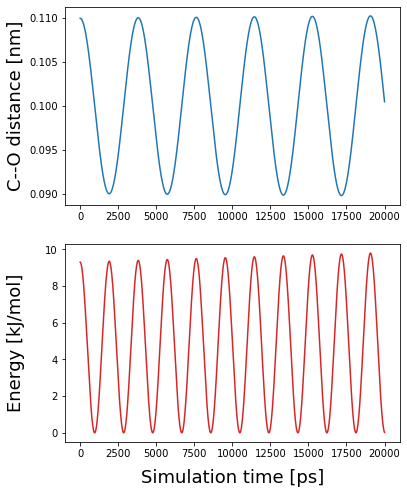

In [11]:
from shared.mdtools import plot_traj
%matplotlib inline
plot_traj(distances, energies, combine=False);

---
## <font color='Teal'>Exercise 3:

Compare the plots for the C–O distances and the computed energies at each time step. 

* What can you conclude from these plots? Is it in line with what you have expected? 
Explain why, or why not.

__Hint__: It may be instructive to plot both curves in the same graph (see below). 

---

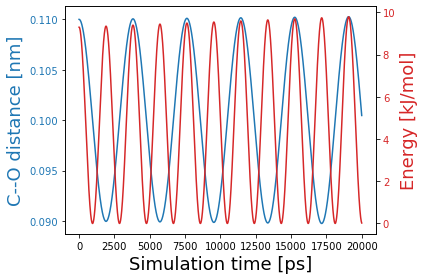

In [12]:
# Plot energies and distances in same graph
from shared.mdtools import plot_traj
from matplotlib import pyplot as plt
%matplotlib inline
plot_traj(distances, energies, combine=True);

---
## <font color='DarkMagenta'>Solution 3:

Compare the plots for the C–O distances and the computed energies at each time step. 

* What can you conclude from these plots? Is it in line with what you have expected? 
Explain why, or why not.

__Hint__: It may be instructive to plot both curves in the same graph (see below). 

<br>

<font color='DarkMagenta'>
    
From the plots we can see that the potential energy is minimum at the equilibrium CO distance (0.1 nm). At any point where the deviation from this equilibrium distance is maximal (C,O maximally apart) or minimal (C,O closest together), the energy is at maximum. The potential energy therefore fluctuates with twice the frequency of the atom oscillation. 

If looking closely, one can see that the energy and oscillation in fact are running up as a function of time. If we would increase the number of steps (e.g. to 100000) one can start to see that the system is unstable. You can ask the students to change the number of steps in their simulation and plot the function again. They will see that the oscillation amplitude, and therefore the potential energy runs up. The reason why we are seeing this is that we are making very primitive assumptions in this MD engine. We take no care of the law of energy conservation, which would imply we would need to couple our MD engine to a temperature bath so that energy can be dissipated to the bath. 

## 2. Molecular dynamics simulation of Adenylate Kinase

----
### 2.1 Introduction
Many proteins function as dynamic molecular machines that cycle between well-defined structural states. In this practical we will analyse molecular dynamics of _Escherichia coli_ adenylate kinase (__AdK__), a phosphotransferase enzyme. __AdK__ undergoes a large conformational change between an open and a closed state, even in the absence of substrate. 

It regulates the concentration of free adenylate nucleotides within the cell by catalyzing the conversion of ATP and AMP into two ADP molecules:

AdK It regulates the concentration of free adenylate nucleotides within the cell by catalyzing the reversible transfer of a phosphoryl group from ATP to AMP, yielding two ADP molecules via the reaction: 

#### <code>Mg<sup>2+</sup>&bull;ATP + AMP ⇌ 2 ADP + Mg<sup>2+</sup></code>
<br/>

The enzymes consist of three domains (Figure 1): the large CORE domain comprising the central parallel β-sheet with several surrounding α-helices; the small NMPbind domain forming the NMP-binding site; and the small LID domain covering the phosphates at the active center.

<img align="left" src="images/adk.jpg">
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
Figure 1: AdK in the "open" state (left) and the "closed" state with the inhibitor Ap5a bound to the active site;

Let us look once more at the trajectory connecting these states:

In [14]:
from shared.mdtools import view_adk_traj
view_adk_traj()

NGLWidget(max_frame=97)

## 2.2 Validating MD simulations

One important thing to realize is that MD simulations are computational experiments that attempt to predict or rationalize other experimental observations.

The result of the simulation, and what we can learn from it, will always only be as good and reliable as the model underlying our simulation. It is therefore really important to test computational observations against other and complementary observations from laboratory experiments.

The individual steps along an MD trajectory describing the conformational change of e.g. AdK are too fast to be captured with currently available experimental methods. But the end states, i.e. the __open__ and __closed__ states may be accesible as they are conformational states that are the equilibrium states in the absence of substrate (=open) or can be stabilizes by binding an inhibitor (=closed). Small angle X-ray scattering (SAXS) is one experimental technique that can provide information on such states. X-rays that are directed to a dilute solution containing the protein are scattered by the molecules. This leads to a characteristic pattern of the pair distance distribution function ___P(r)___, or PDDF, the paired-set of all distances between points within an object; in this case a macromolecular structure. The PDDF is therefore a useful tool for visibly detecting conformational changes within a macromolecule. 

Let us looks a the PDDFs of the open and closed states of AdK.

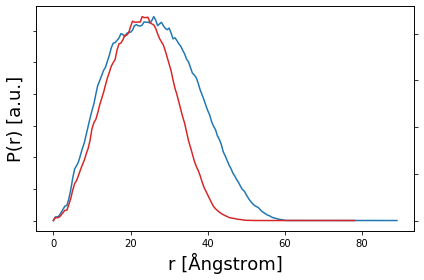

In [15]:
from shared.mdtools import plot_pair_distance_distribution_function
plot_pair_distance_distribution_function();

They clearly look different. It turns out that from this pair distance distribution plot we can derive a formulation for the radius of gyration ___R<sub>g</sub>___:
<br><br>

$
\begin{multline}
\mathbf{R_g}^2 = \frac{\int_{0}^{\infty} P(r)r^2 \,dr}{2\int_{0}^{\infty} P(r) \,dr} \tag 6\,
\end{multline}
$

<br>
The radius of gyration is a good estimate of the "compactness" of a molecule. It is also a quantity that we can easily compute from our MD trajectory of adenylate kinase. Let us therefore calculate R<sub>g</sub> from the PDDF data we have obtained with our SAXS experiments:


In [16]:
import numpy as np
from shared.mdtools import import_saxs_data

# compute PDDF from SAXS data
pddf_open, pddf_closed = import_saxs_data()
rg_closed = np.sqrt(np.sum(pddf_closed[0]**2*pddf_closed[1])/np.sum(2*pddf_closed[1]))
rg_open = np.sqrt(np.sum(pddf_open[0]**2*pddf_open[1])/np.sum(2*pddf_open[1]))


print("\n**** EXPERIMENTAL RADIUS OF GYRATION ****\n")  
print("Radius of gyration for closed ADK form\t: %.1f Ångstrom" % rg_closed)
print("Radius of gyration for open ADK form\t: %.1f Ångstrom" % rg_open) 



**** EXPERIMENTAL RADIUS OF GYRATION ****

Radius of gyration for closed ADK form	: 17.0 Ångstrom
Radius of gyration for open ADK form	: 19.9 Ångstrom


Now let us compute the radius of gyration as it has evolved throughout the MD trajectory of AdK.

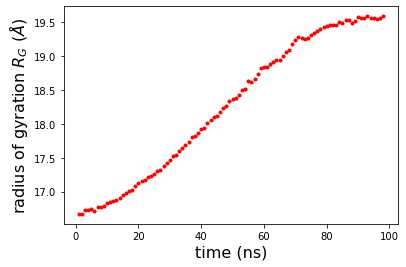

In [17]:
from shared.mdtools import compute_radius_of_gyration
compute_radius_of_gyration();

---
## <font color='Teal'>Exercise 4:

* Compare the radii of gyration obtained from the SAXS experiments with those from the simulation. Do they match?  


* Open the open and closed form of AdK in PyMOL. You can find the files [here](https://gitlab.tudelft.nl/aj-lab/teaching/tree/master/binder/pdb). Can you make sense out of the SAXS P(r) curves when investigating the structure?


* Describe the plot of the radius of gyration along the trajectory. If you think of an energy surface that the molecule explores, what can you conclude from the shape of this curve?  


* Can you think of alternative ways how you can validate results from MD simulations?  

---

---
## <font color='DarkMagenta'>Solution 4:

* Compare the radii of gyration obtained from the SAXS experiments with those from the simulation. Do they match?  

<font color='DarkMagenta'>
The experimental values from the SAXS experiments match fairly well with those from the simulations. The Rg of the closed form is smaller in the simulation than in the experiment. This may have to do with the fact that there may be other structural fluctuations that are leading to slightly larger Rg in the experimental setting compared to a single, compact structure at the start of the MD simulation.  
<br><br>
<font color='black'>
    
* Open the open and closed form of AdK in PyMOL. You can find the files [here](https://gitlab.tudelft.nl/aj-lab/teaching/tree/master/binder/pdb). Can you make sense out of the SAXS P(r) curves when investigating the structure?

<font color='DarkMagenta'>
We will skip this question...
    
<font color='black'>
<br>
    
* Describe the plot of the radius of gyration along the trajectory. If you think of an energy surface that the molecule explores, what can you conclude from the shape of this curve?

<font color='DarkMagenta'>The Rg first slowly takes of at the start of the simulation and then rapidly increases until it reaches a plateau. We start of from an local minimum in energy. Once we have overcome some activation barrier, the conformational change of opening the active site rapidly unfolds until we reach another local energy minimum in which we are only fluctuating around the open state. 

<font color='black'>
<br>
    
* Can you think of alternative ways how you can validate results from MD simulations?  

<font color='DarkMagenta'>
    
You would like to use methods that can monitor distances at a rapid time scale. One could think, for example, of FRET measurements with suitably labeled fluorophores, which can measure distances very precisely. The conformational changes however, would need to be sufficiently slow to be monitored in this way. The sudents do not really come up with any specific method and they probabyl cannot. I only would like them to realize that they would need methods that can follow distance changes between different parts of the structure at a very short timescale (milliseconds to microseconds).

## <font color='Teal'>Bonus exercise

You will have realized that our molecular dynamics engine for CO was very much simplified as we only have to account for one force acting on both atoms. Of course, this becomes much more complicated if we have many more atoms in our structure.

However, it is not so difficult to extend the engine to arbitrary molecular systems that contain more than 2 atoms. This is a voluntary exercise (no bonus points!), but it may teach you a lot about thinking conceptually about MD simulations.

* Try to formulate an extension to the algorithm in 1.3 that would account for more than 2 atoms. Try to still do this with a simple example, e.g. CO2, which will contain 3 and not 2 atoms. If you formulate your algorithm efficiently, it will be equally applicable to two, three, four and more atoms.

You can email your answer to <a.jakobi@tudelft.nl> with "__PBoC2 Practical 6__" in the subject line. I will give you feedback on your answer. It can be actual code, if you are familiar with Python, or simply worked out formula(s) on paper.

### Success!

---
## <font color='DarkMagenta'>Solution 4:

<font color='DarkMagenta'>
One needs to first initialize the atoms and equilibrium distances for CO<sub>2</sub>.

```
atoms = ['O', 'C', 'O']
r_eq  = 0.11200
k     = 1200e2
```

All that is needed then is to generalize the verlet integrator to loop over all atom pairs. This is no different for three atoms, or 10, or 100s of atoms. Note that this integrator is still primitive: it only considers bonded atoms, we do not take into account any non-bonded interactions between atoms. For this case we would need to calculate first the force terms of the bonded interactions and then also integrate the forces from all non-bonded interactions within a certain interaction radius. From the sum of all force vectors, we can then determine the magnitude and direction of the resultant force.

```python
def verlet_integrator_general(r0, v0, dt, n_steps=100, filename="trajectory.xyz"):
    """
    Integrate the equations of motions for many bonded atoms.
    """
    
    # create a box for periodic boundary conditions 
    box = np.array([1.,1.,1.])

    print("Starting Verlet integration: nsteps = %d \n" % n_steps)

    n_atoms = len(atoms)
    r = np.zeros((n_atoms, 3))

    # *fill* x with the values from x0
    r[:] = r0

    # bootstrap: generate previous point
    for i in range(n_atoms):
        r0[i] = r[i] - v0[i]*dt
    
 # Compute energies and interatomic distances and write coordinates to a file
    energies = []
    distances = []
    with  open(filename, "w") as  xyz:
        for istep in range(n_steps):
            #************************************************************
            # Compute forces on atom pair i|j
            #************************************************************
            for i in range(n_atoms):
                for j in range(i+1,n_atoms):
                    fi    = F_bond(r0[i], r0[j], k, r_eq)
                    r_new = verlet_position(r[i], r0[i], fi, dt, m_C)
                    r0[i] = r[i]
                    r[i]  = r_new
                    fj    = -fi
                    r_new = verlet_position(r[j], r0[j], fj, dt, m_C)
                    r0[j] = r[j]
                    r[j]= r_new
            
            #************************************************************
            # Compute interatomic distances and potential energies
            #************************************************************
    
            distance = compute_rmag(r[1]-r[2])
            distances.append(distance)

            energy = U_bond(r0[0], r0[1], k, r_eq)
            energies.append(energy[2])
            
            # (NOTE: we write 10*x0 because we want the xyz file in Angstroem, not in nm)
            if istep%100 == 0:
                mdIO.write_xyz_frame(xyz, atoms, 10*r0, 10*box, istep*dt)            

    print("Integrator finished. Output written to %r" % filename)
    return distances, energies
```